In [1]:
actual=[1 for i in range(5)]+[0 for i in range(5)]
pred=[1 for i in range(3)]+[0,1,0,1,0]+[1 for i in range(2)]
print(actual,pred)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0] [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]


In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
tn,fp,fn,tp=confusion_matrix(actual,pred).ravel()
print(tn,fp,fn,tp)

2 3 1 4


In [4]:
def myacc():
    return (tp+tn)/(tp+tn+fn+fp)
def mysensitivity():
    return tp/(tp+fn)
def myspecificity():
    return tn/(tn+fp)
def myprecision():
    return tp/(tp+fp)
def myrecall():
    return tp/(tp+fn)
def myf1():
    return 2*myprecision()*myrecall()/(myprecision()+myrecall())
import numpy as np
def mymcc():
    return (tn*tp-fp+fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
def myconfmat():
    return "[[{} {}]\n [{} {}]]".format(tp,fp,fn,tn)

In [5]:
print(myacc(),mysensitivity(),myspecificity(),myprecision(),myrecall(),myf1(),mymcc())

0.6 0.8 0.4 0.5714285714285714 0.8 0.6666666666666666 0.2618614682831909


In [6]:
print(myconfmat())

[[4 3]
 [1 2]]


In [7]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,precision_score,matthews_corrcoef
print(accuracy_score(actual,pred),recall_score(actual,pred),f1_score(actual,pred),precision_score(actual,pred),matthews_corrcoef(actual,pred))
print(confusion_matrix(actual,pred))

0.6 0.8 0.6666666666666666 0.5714285714285714 0.2182178902359924
[[2 3]
 [1 4]]


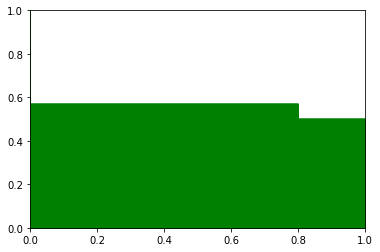

In [8]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision,recall,_ =precision_recall_curve(actual,pred)
plt.step(recall,precision,color='g',where='post')
plt.fill_between(recall,precision,color='g',step='post')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

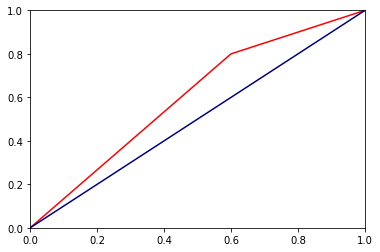

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr,tpr,_ =roc_curve(actual,pred)
plt.plot(fpr,tpr,c="red")
plt.plot([0, 1], [0, 1], color='navy') #center line
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

In [10]:
print("Area under curve is: ",roc_auc_score(actual,pred))

Area under curve is:  0.6000000000000001
